In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

# Networkx basics

[1, 3, 2]
[(1, 2), (1, 3)]


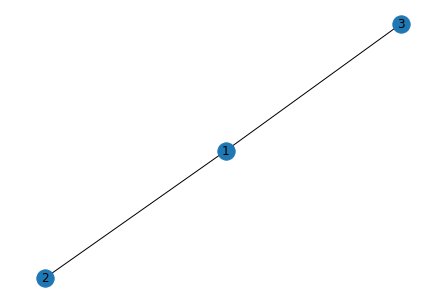

In [2]:
g = nx.Graph() # Creates a graph

g.add_node(1)  # Adds node 1
g.add_node(3)
g.add_node(2)
print(g.nodes())

g.add_edge(1, 2) # Adds edge from node 1 to node 2
g.add_edge(1, 3)
print(g.edges())

nx.draw(g, with_labels=True)  # Draw the graph
plt.show()  # Show the graph in a separate window

In [3]:
print(list(g.neighbors(3)))

[1]


# Network analysis: Centrality

Centrality is a term to describe importance of individual nodes in a graph. There has been a lot of research carried out in this topic for network analysis to answer the question, “Which are the most important nodes (vertices) in a graph?” Here is the list of different metrics to find it, which I would like to discuss:

    Degree Centrality
    Eigenvector Centrality
    Katz Centrality
    PageRank
    HITS Hubs and Authorities
    Closeness Centrality
    Betweenness Centrality


## Zachary’s Karate Club

Zachary’s Karate Club graph is defined as the example graph G. It is basically a social network of members of an university karate club, where undirected edges connects people who interact outside the club. This network was first presented in [1].

[1] W. W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977).

In [4]:
G = nx.karate_club_graph()


In [5]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [6]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [7]:
nodes = G.nodes()
edges = G.edges()

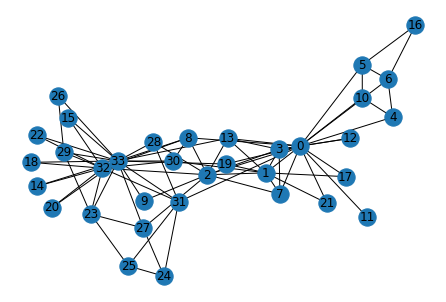

In [8]:
nx.draw(G, with_labels=True)

In [9]:
pos = nx.spring_layout(G)

## Directed graph (toy example)

We also need a directed graph to demonstrate some other centrality measures. Here we are defining the toy directed graph DiG which is given as an example in wikipedia.

In [10]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])

dpos = nx.spring_layout(DiG)
dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

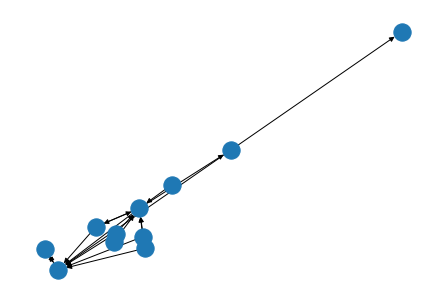

In [11]:
nx.draw(DiG)

## Degree

Degree of a node is basically number of edges that it has. The basic intuition is that, nodes with more connections are more influential and important in a network. In other words, the person with higher friend count in a social network, the more cited paper (in-degree) in a scientific citation network is the one that is more central according to this metric.

In [12]:
nx.degree_centrality(G)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

First, we are defining a simple method to draw the graph and the centrality metrics of nodes with a heat map.

In [13]:
def draw(G, pos, measures, measure_name, logscale=False, labels=False):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.Blues, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_edgecolor('k')
    
    if logscale:
        nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    if labels:
        labels = nx.draw_networkx_labels(G, pos)
        
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

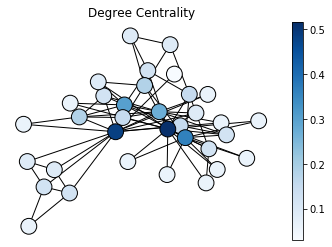

In [14]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

For directed graphs, in-degree, number of incoming points, is considered as importance factor for nodes.



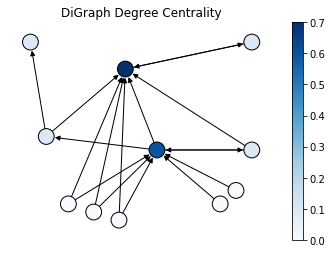

In [15]:
draw(DiG, dpos, nx.in_degree_centrality(DiG), 'DiGraph Degree Centrality')

## Eigenvector centrality

Eigenvector centrality is a basic extension of degree centrality, which defines centrality of a node as proportional to its neighbors’ importance. When we sum up all connections of a node, not all neighbors are equally important. 

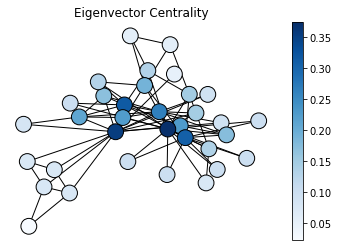

In [16]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

In [17]:
degree = nx.degree_centrality(G)
eigen = nx.eigenvector_centrality(G)

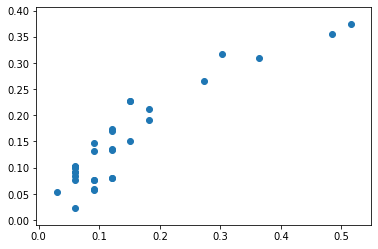

In [18]:
plt.scatter([degree[i] for i in sorted(degree.keys())],[eigen[i] for i in sorted(eigen.keys())])

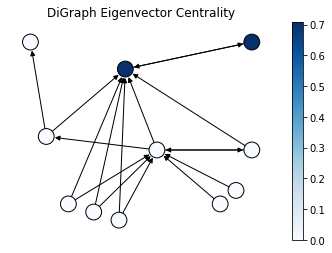

In [19]:
draw(DiG, dpos, nx.eigenvector_centrality_numpy(DiG), 'DiGraph Eigenvector Centrality')

Here the contribution from zero in-degree nodes is zero; consequently, all values are zero except two nodes which are referencing each other.

## PageRank

PageRank was introduced by the founders of Google to rank websites in search results. It can be considered as an extension of Katz centrality. The websites on the web can be modeled as a directed graph, where hypermedia links between websites determines the edges. Let’s consider a popular web directory website with high Katz centrality value which has millions of links to other websites. It would contribute to every single website significantly, nevertheless not all of them are important. To overcome that issue, contribution value is divided by out-degree of the node:

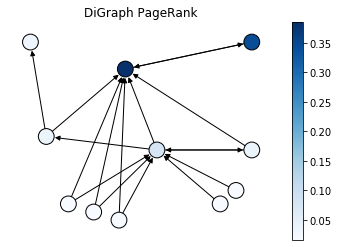

In [20]:
draw(DiG, dpos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank')

## Hubs and Authorities

HITS algorithm introduces two types of central nodes: Hubs and Authorities. Authorities are the one that most cited by Hubs and Hubs are the one that citing the most high Authority nodes.

Authority Centrality is defined as the sum of the hub centralities which point to the node i

Hub Centrality is the sum of the authorities which are pointed by the node i

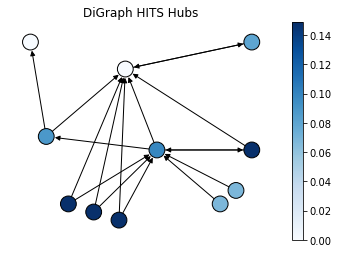

In [21]:
h,a = nx.hits(DiG)
draw(DiG, dpos, h, 'DiGraph HITS Hubs')


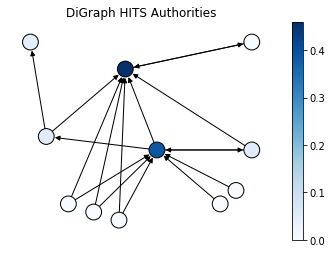

In [22]:
draw(DiG, dpos, a, 'DiGraph HITS Authorities')

## Closeness Centrality

Closeness Centrality is a self-explanatory measure where each node’s importance is determined by closeness to all other nodes. 

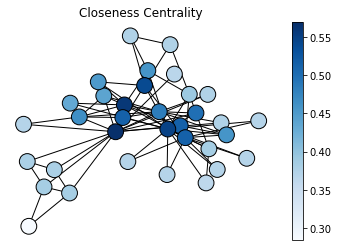

In [23]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

## Betweenness Centrality

Betweenness Centrality is another centrality that is based on shortest path between nodes. It is determined as number of the shortest paths passing by the given node.

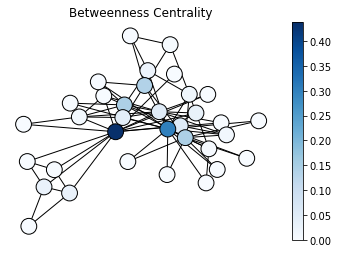

In [24]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')